In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

fb = pd.read_csv('Forbes Billionaires.csv')

fb.head(10)

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,diversified


In [13]:
t10_cb = fb['Country'].value_counts().nlargest(10)
t10_cb

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

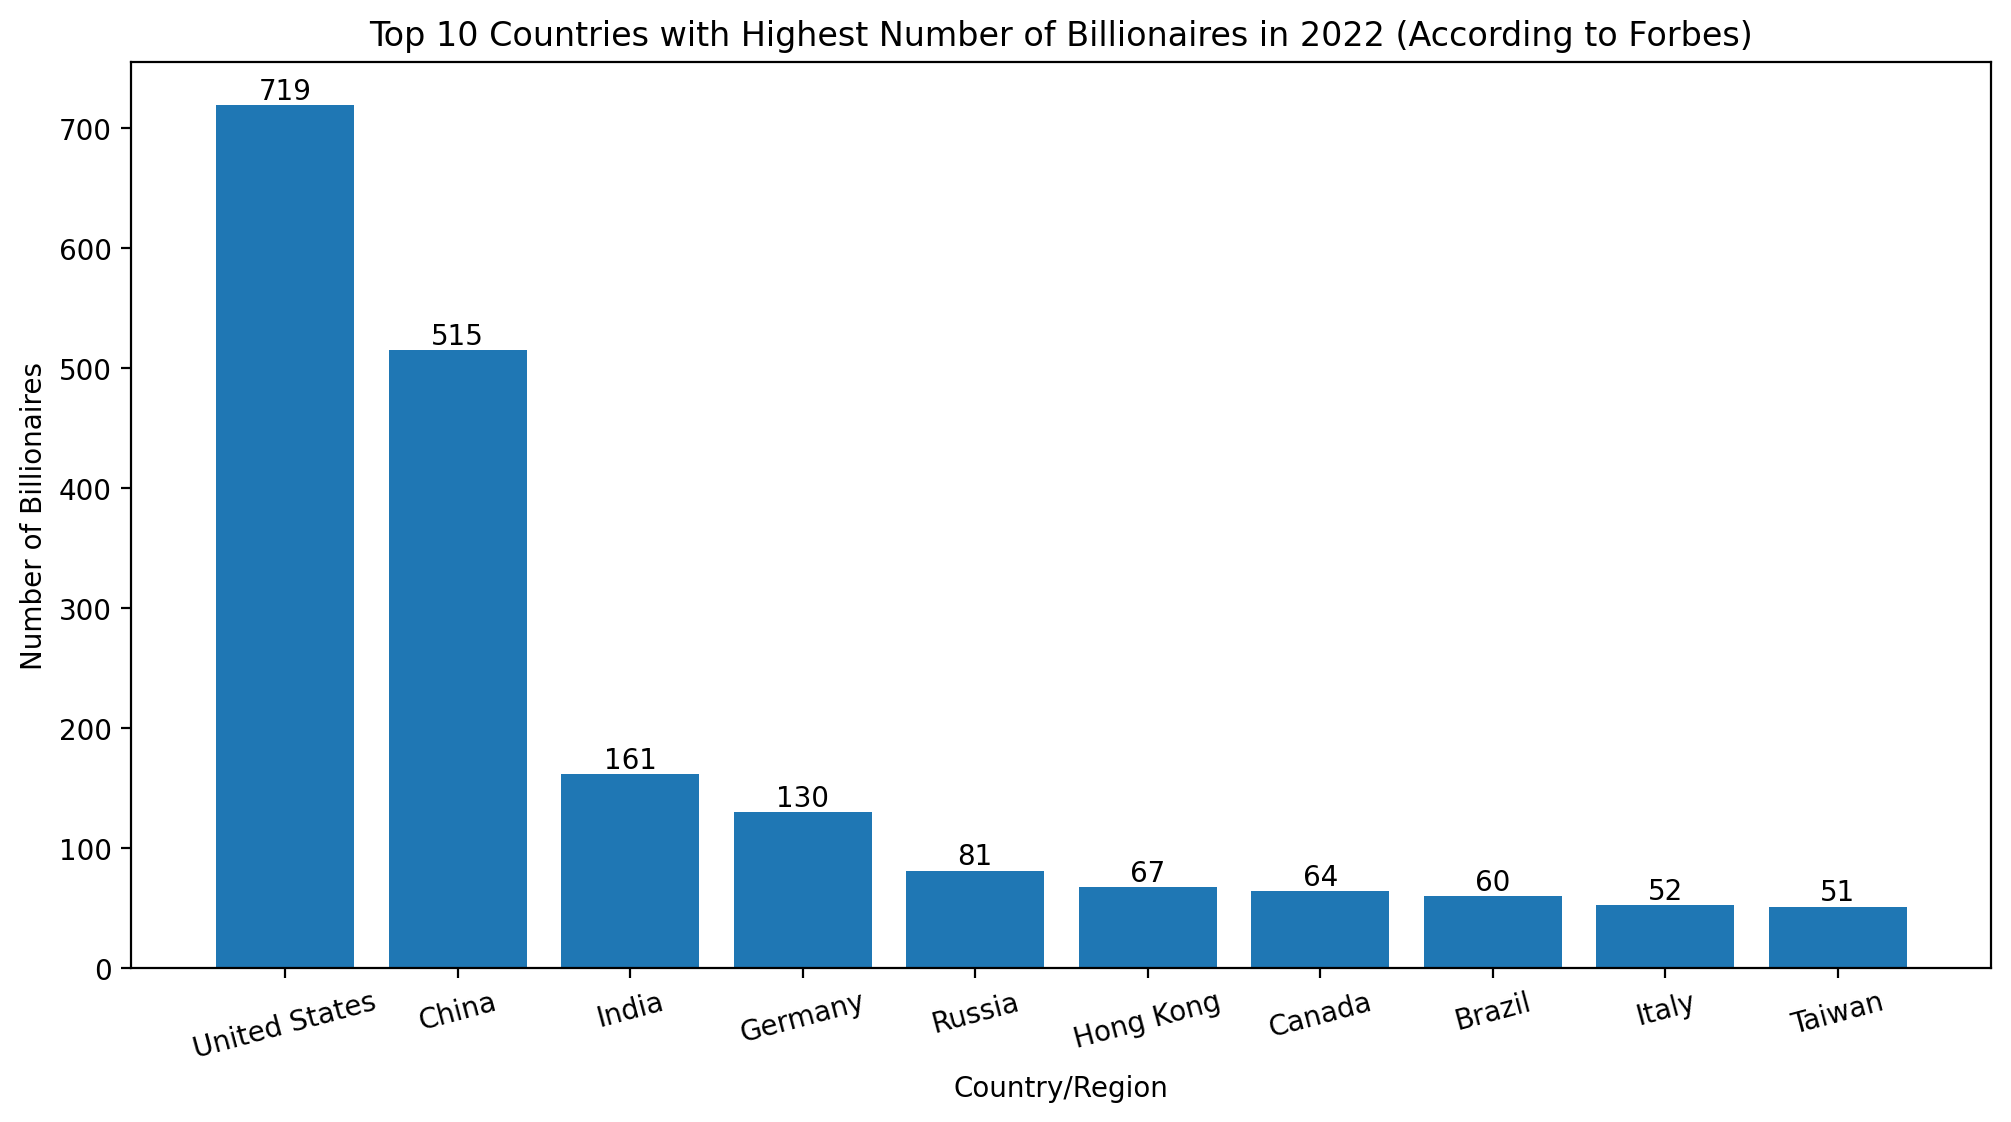

In [23]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)

plt.bar(t10_cb.index, t10_cb)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Countries with Highest Number of Billionaires in 2022 (According to Forbes)')
plt.xlabel('Country/Region')
plt.ylabel('Number of Billionaires')

plt.xticks(rotation = 15)

plt.show()

### Average Wealth of Billionaires by Country

In [28]:
mean_wb_country = fb.groupby('Country')['Networth'].mean().nlargest(10)
mean_wb_country

Country
France           12.790698
Mexico           10.726667
Nigeria           9.400000
Denmark           7.000000
United States     6.516134
Ireland           6.088889
Colombia          6.025000
Cyprus            5.733333
Hong Kong         5.722388
Austria           5.609091
Name: Networth, dtype: float64

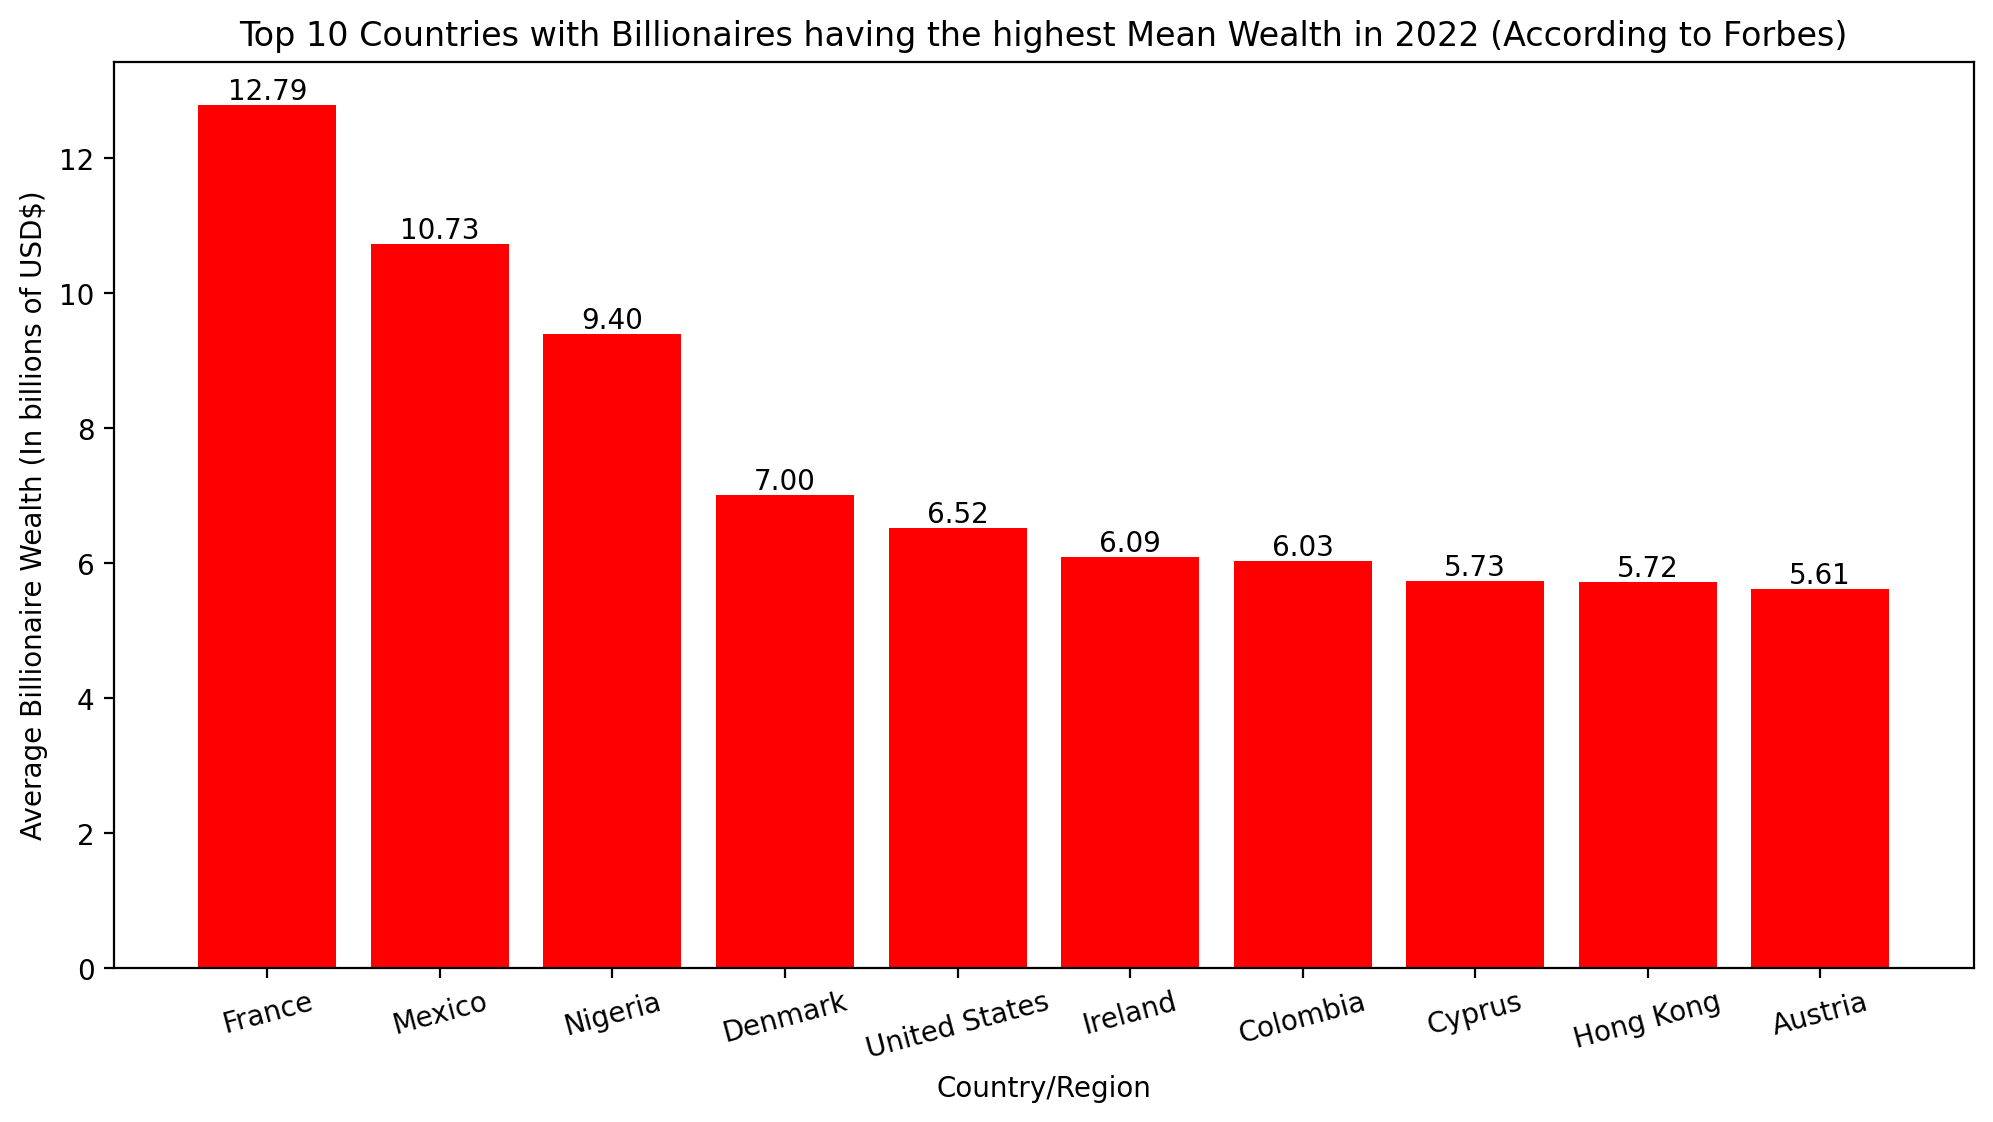

In [33]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)

plt.bar(mean_wb_country.index, mean_wb_country, color = 'red')
ax.bar_label(ax.containers[0], fmt = '%.2f')

plt.title('Top 10 Countries with Billionaires having the highest Mean Wealth in 2022 (According to Forbes)')
plt.xlabel('Country/Region')
plt.ylabel('Average Billionaire Wealth (In billions of USD$)')

plt.xticks(rotation = 15)

plt.show()

### Total Wealth of Billionaires by Country

In [36]:
sum_wb_country = fb.groupby('Country')['Networth'].sum().nlargest(10)
sum_wb_country

Country
United States     4685.10
China             1938.45
India              744.80
Germany            604.00
France             550.00
Hong Kong          383.40
Russia             318.20
Canada             307.90
Australia          205.10
United Kingdom     199.10
Name: Networth, dtype: float64

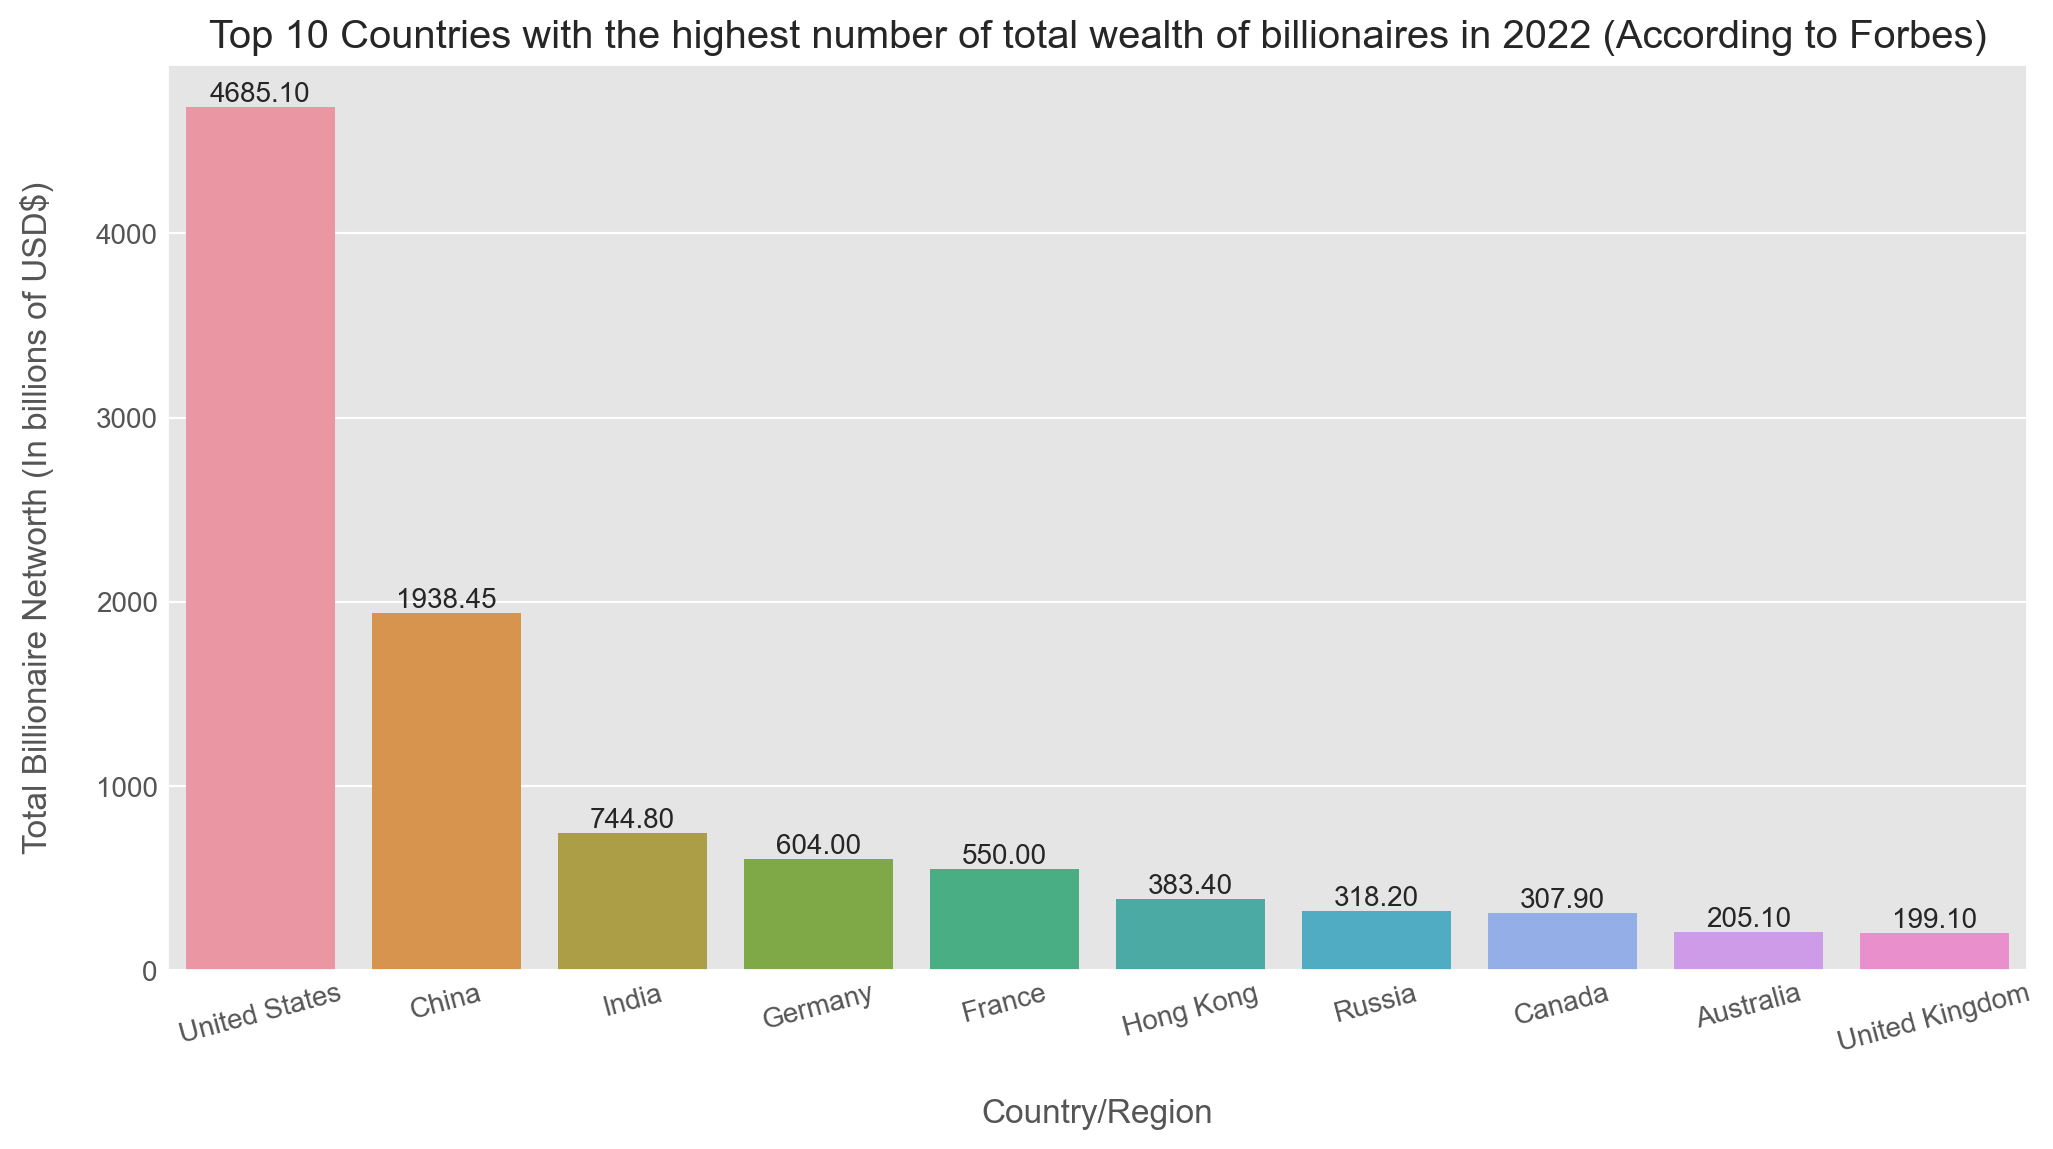

In [47]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)

sns.barplot(x = sum_wb_country.index, y = sum_wb_country)
ax.bar_label(ax.containers[0], fmt = '%.2f')

plt.title('Top 10 Countries with the highest number of total wealth of billionaires in 2022 (According to Forbes)')
plt.xlabel('Country/Region', labelpad = 15)
plt.ylabel('Total Billionaire Networth (In billions of USD$)', labelpad = 15)

plt.xticks(rotation = 15)

plt.show()

### Top 10 Industries with the most number of Billionaires (According to Forbes, 2022)

In [52]:
t10_ib = fb['Industry'].value_counts().nlargest(10)
t10_ib

Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Food & Beverage           201
Real Estate               189
diversified               178
Media & Entertainment      95
Energy                     93
Name: Industry, dtype: int64

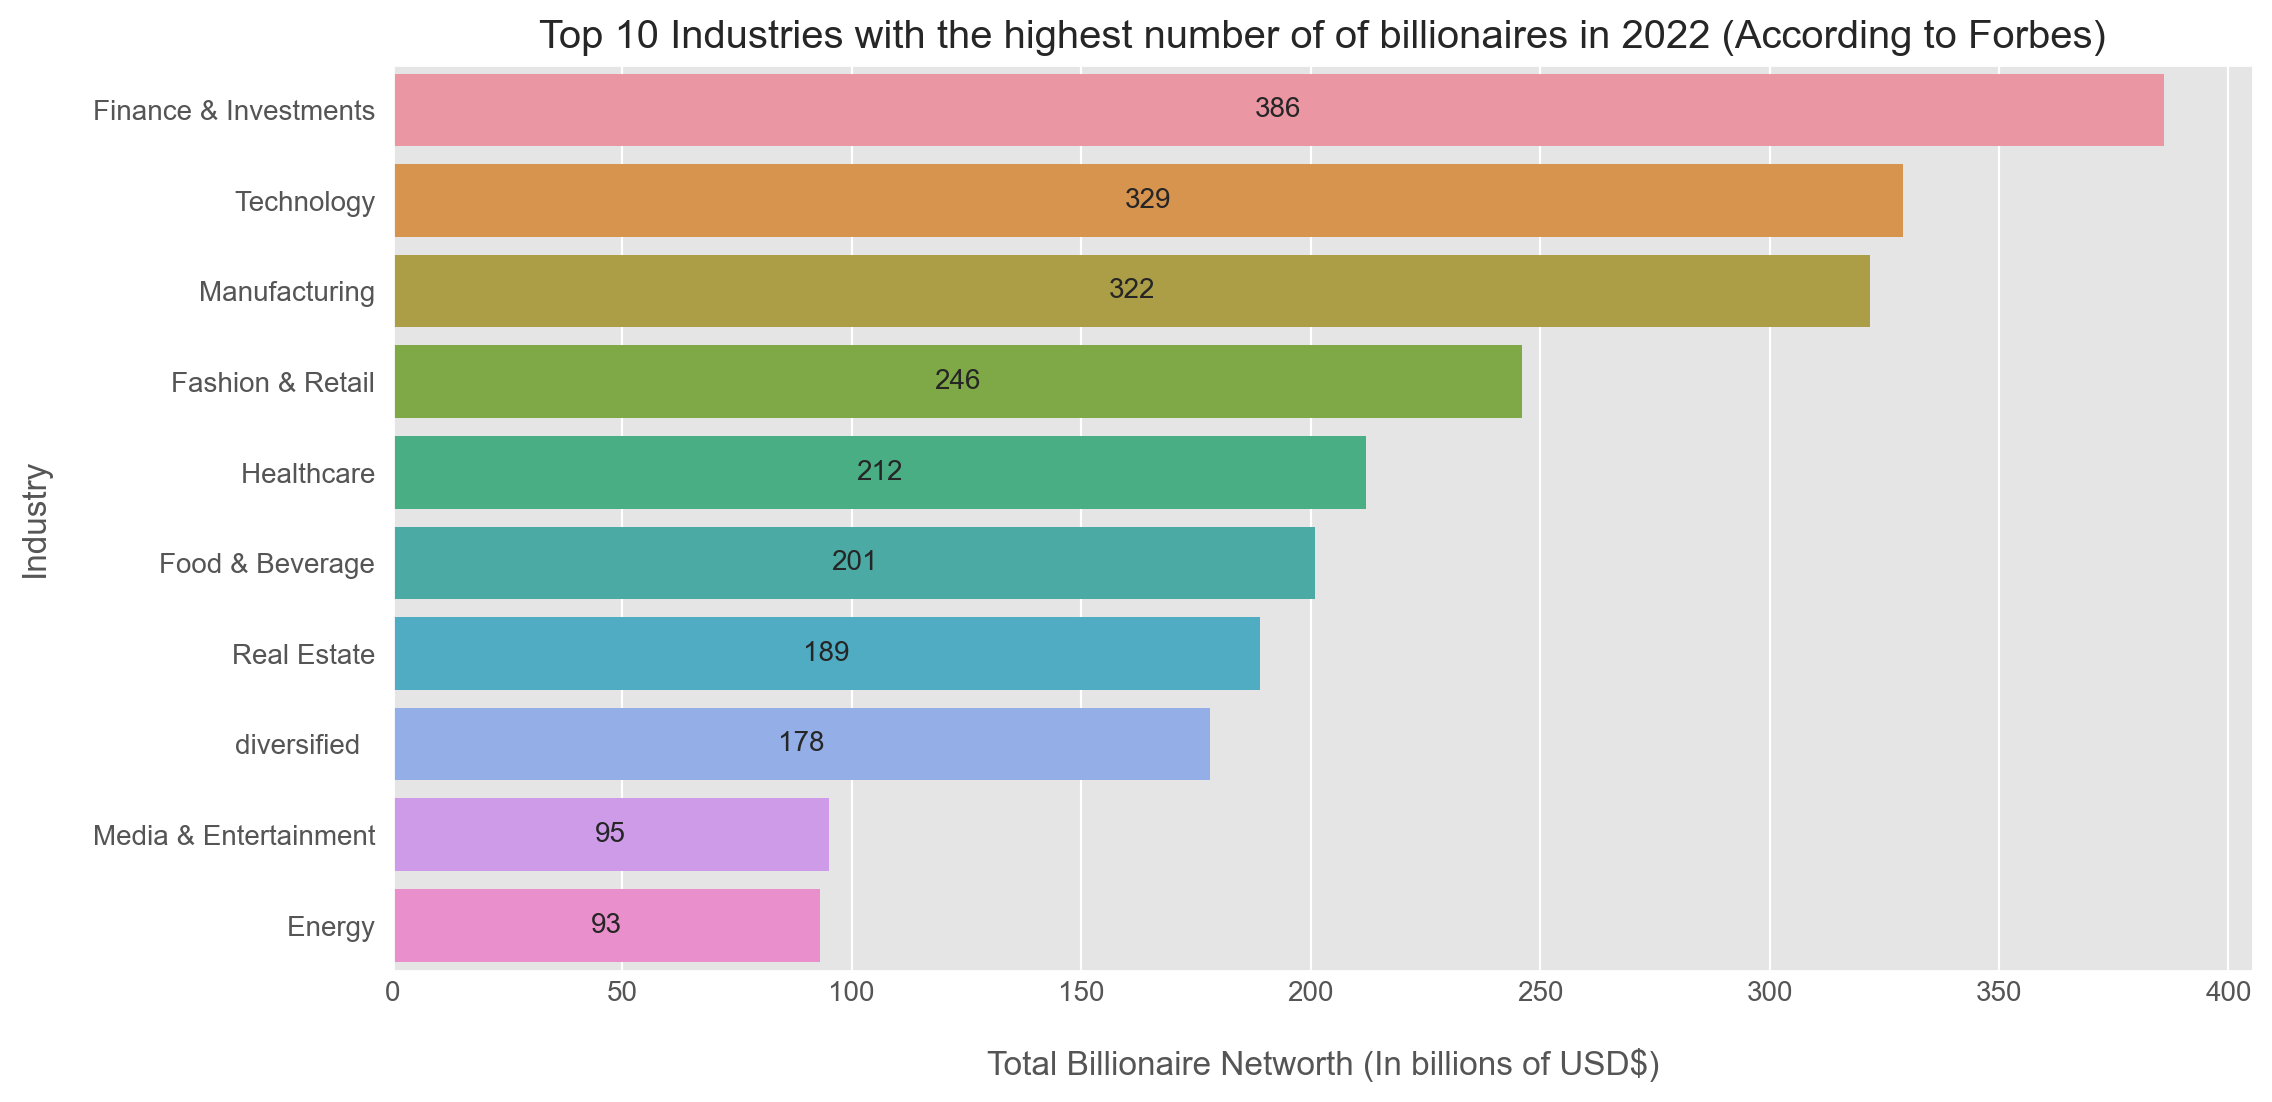

In [59]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)

sns.barplot(x = t10_ib, y = t10_ib.index)
ax.bar_label(ax.containers[0], label_type = 'center')

plt.title('Top 10 Industries with the highest number of of billionaires in 2022 (According to Forbes)')
plt.ylabel('Industry', labelpad = 15)
plt.xlabel('Total Billionaire Networth (In billions of USD$)', labelpad = 15)

plt.show()

### Scatter Plot to find relationship between Billionaire Age and Networth (If any)

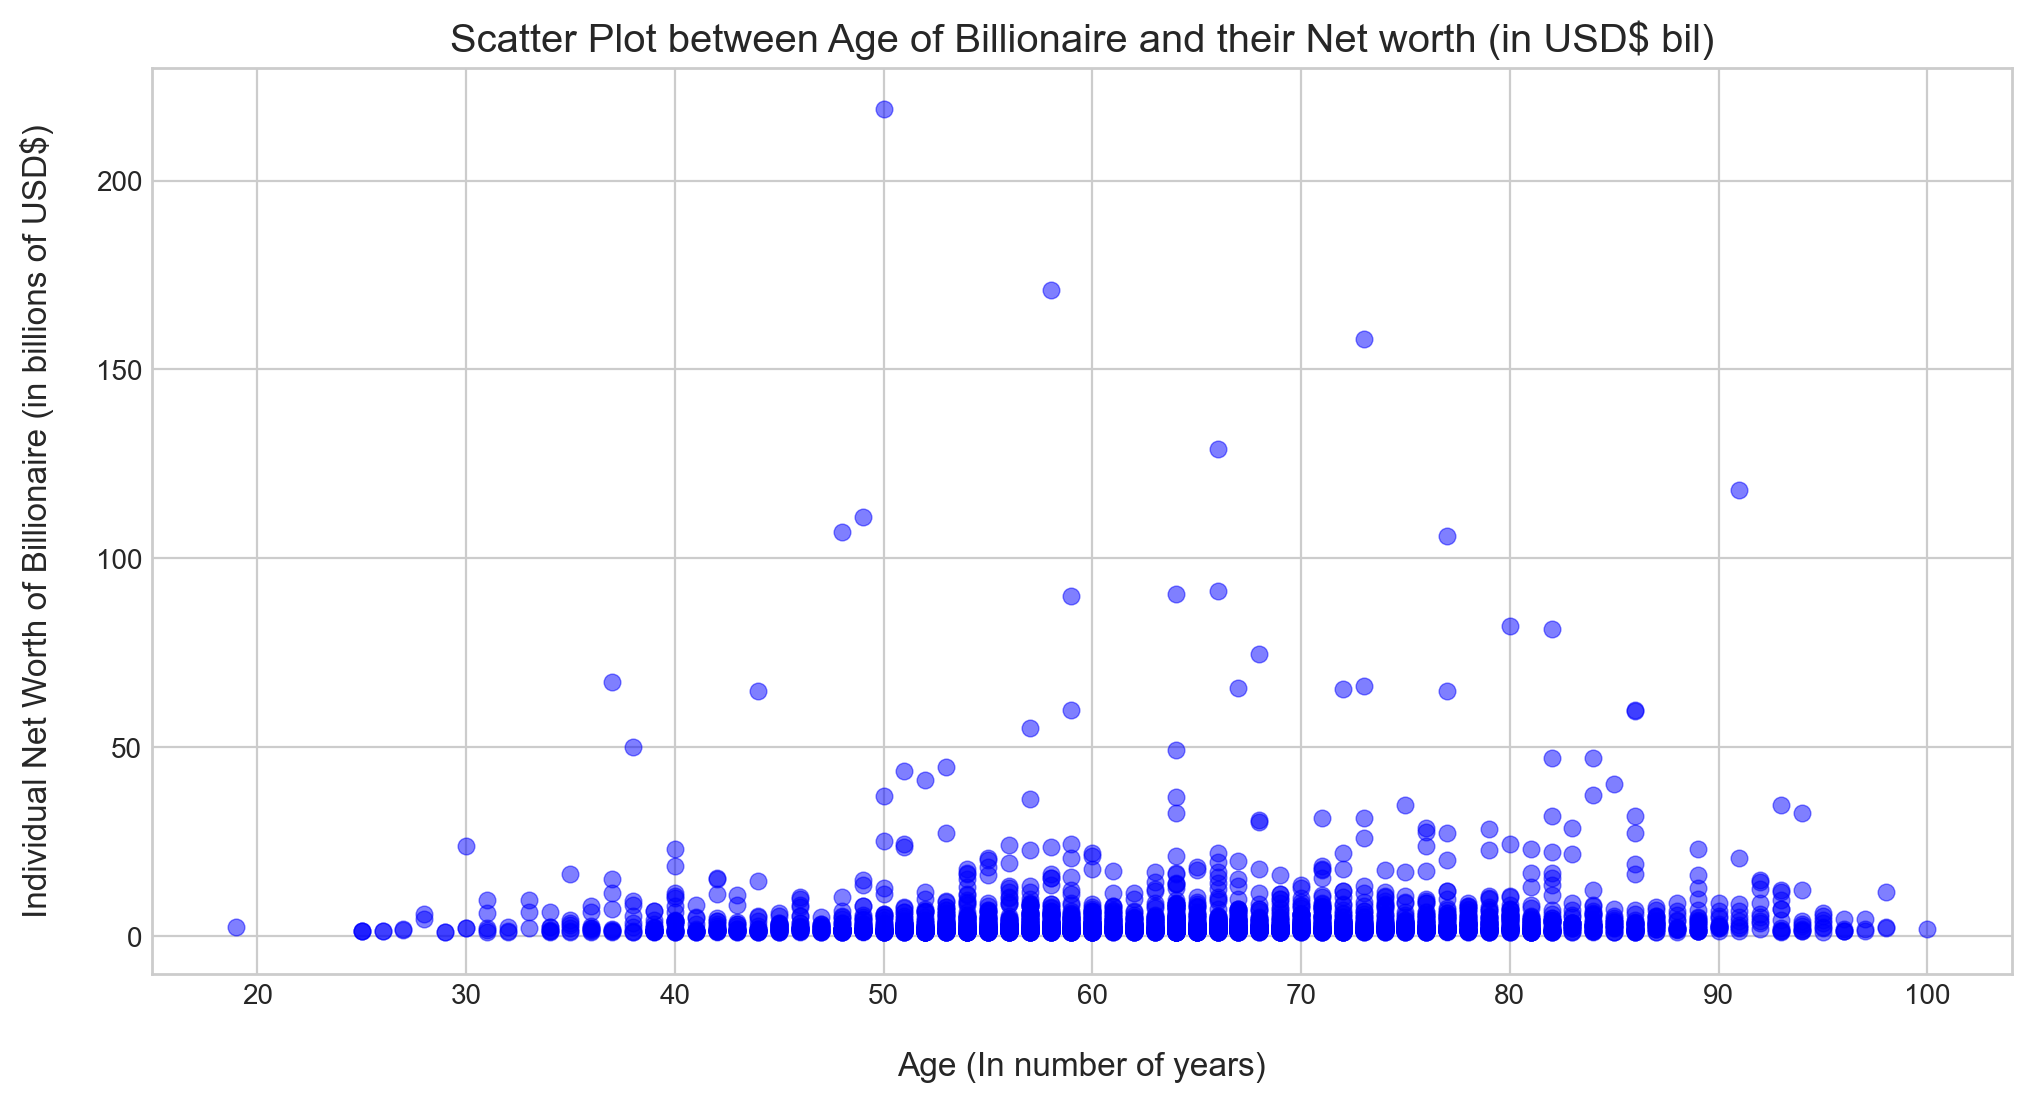

In [80]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)

plt.scatter(data = fb, x = 'Age', y = 'Networth', alpha = 0.5, color = 'blue')

plt.title('Scatter Plot between Age of Billionaire and their Net worth (in USD$ bil)')
plt.ylabel('Individual Net Worth of Billionaire (in billions of USD$)', labelpad = 15)
plt.xlabel('Age (In number of years)', labelpad = 15)

plt.show()

In [81]:
data = pd.DataFrame({'x': fb['Age'], 'y': fb['Networth']})
data.corr()

,x,y
x,1.000000,0.039966
y,0.039966,1.000000


In [63]:
model = smf.ols('Networth ~ Age', data = fb)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Networth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.156
Date:                Fri, 03 Jun 2022   Prob (F-statistic):             0.0416
Time:                        09:14:00   Log-Likelihood:                -9839.5
No. Observations:                2600   AIC:                         1.968e+04
Df Residuals:                    2598   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7896      1.037      2.690      0.0